# Exploring the proportion of land that is considered to be in a drought in Imperial & Riverside County
## Data was obtained from US Drought Monitoring System & WiFire Commons

First, I will import all the libraries I may need in the notebook

In [1]:
# import libraries
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as ctx

Next, I will upload the gjsn file that has the county boundaries. I also inspect the data set to determine which column name/variable I will use to merge the data with my csv file containing drought information. In this case, I am interested in extracting only the shapefile around Imperial & Riverside County, using the CountyName column.

In [2]:
counties_gdf = gpd.read_file('https://gis-calema.opendata.arcgis.com/datasets/59d92c1bf84a438d83f78465dce02c61_0.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D')

In [3]:
counties_gdf.sample(10)

OBJECTID   CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
2          3       Amador      Inland       4      4            06   
18        19  Los Angeles    Southern       1      1            06   
19        20       Madera      Inland       5      5            06   
51        52       Tehama      Inland       3      3            06   
14        15         Kern      Inland       5      5            06   
8          9    El Dorado      Inland       4      4            06   
40        41    San Mateo     Coastal       2      2            06   
11        12     Humboldt     Coastal       2      2            06   
57        58         Yuba      Inland       3      3            06   
52        53      Trinity      Inland       3      3            06   

   County_FIPS_ID   Shape__Area  Shape__Length  \
2             005  2.559998e+09  357482.565247   
18            037  1.556206e+10  949056.873805   
19            039  8.811142e+09  600614.053676   
51            103  1.313096e+10  619748.599020   
14            029  3.180518e+10  850410.414528   
8             017  7.639220e+09  466654.488487   
40            081  1.874693e+09  312496.310712   
11            023  1.616587e+10  756496.574594   
57            115  2.786264e+09  364828.158326   
52            105  1.445172e+10  806709.768708   

                                             geometry  
2   POLYGON ((-120.25766 38.58033, -120.25735 38.5...  
18  MULTIPOLYGON (((-117.66648 34.82269, -117.6664...  
19  POLYGON ((-119.30872 37.77839, -119.30823 37.7...  
51  POLYGON ((-121.58877 40.43159, -121.58832 40.4...  
14  POLYGON ((-119.38466 35.79036, -119.38350 35.7...  
8   POLYGON ((-120.29352 39.02431, -120.29175 39.0...  
40  POLYGON ((-122.50164 37.70827, -122.49597 37.7...  
11  POLYGON ((-124.06385 41.46503, -124.06302 41.4...  
57  POLYGON ((-121.07543 39.59777, -121.06865 39.6...  
52  POLYGON ((-122.97592 40.24209, -122.97572 40.2...

After inspecting my csv file, I realized the column names did not match the gjsn file. I renamed the column, CountyName, and removed the word "county" in the values Riverside and Imperial.  

In [4]:
countydf=pd.read_csv('2018_2019Drought.csv')

In [5]:
countydf.sample(10)

MapDate  FIPS CountyName State  None     D0      D1     D2      D3  D4  \
67   20181113  6065  Riverside    CA     0   0.00   59.40  40.24    0.36   0   
35   20180612  6025   Imperial    CA     0   0.00    0.00  28.38   71.62   0   
113  20190108  6073  San Diego    CA     0   0.00   66.53  33.47    0.00   0   
160  20180213  6073  San Diego    CA     0   0.00  100.00   0.00    0.00   0   
122  20181106  6073  San Diego    CA     0   0.00    0.00  94.66    5.34   0   
11   20181127  6025   Imperial    CA     0   0.00   17.71  29.03   53.26   0   
23   20180904  6025   Imperial    CA     0   0.00    0.00  28.38   71.62   0   
97   20180417  6065  Riverside    CA     0   0.00   54.64  32.88   12.48   0   
20   20180925  6025   Imperial    CA     0   0.00    0.00   0.00  100.00   0   
1    20190205  6025   Imperial    CA     0  92.54    7.46   0.00    0.00   0   

     ValidStart    ValidEnd  StatisticFormatID  
67   2018-11-13  2018-11-19                  2  
35   2018-06-12  2018-06-18                  2  
113  2019-01-08  2019-01-14                  2  
160  2018-02-13  2018-02-19                  2  
122  2018-11-06  2018-11-12                  2  
11   2018-11-27  2018-12-03                  2  
23   2018-09-04  2018-09-10                  2  
97   2018-04-17  2018-04-23                  2  
20   2018-09-25  2018-10-01                  2  
1    2019-02-05  2019-02-11                  2

Now that both the column names, and values match, I can merge the files.

In [6]:
newdf= counties_gdf.merge(countydf, on="CountyName")

In [7]:
newdf.head()

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0        13   Imperial    Southern       6      6            06   
1        13   Imperial    Southern       6      6            06   
2        13   Imperial    Southern       6      6            06   
3        13   Imperial    Southern       6      6            06   
4        13   Imperial    Southern       6      6            06   

  County_FIPS_ID   Shape__Area  Shape__Length  \
0            025  1.656500e+10  593759.567299   
1            025  1.656500e+10  593759.567299   
2            025  1.656500e+10  593759.567299   
3            025  1.656500e+10  593759.567299   
4            025  1.656500e+10  593759.567299   

                                            geometry  ...  State  None     D0  \
0  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  92.54   
1  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  92.54   
2  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  15.36   
3  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  15.63   
4  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  13.43   

      D1   D2   D3  D4  ValidStart    ValidEnd StatisticFormatID  
0   7.46  0.0  0.0   0  2019-02-12  2019-02-18                 2  
1   7.46  0.0  0.0   0  2019-02-05  2019-02-11                 2  
2  84.64  0.0  0.0   0  2019-01-29  2019-02-04                 2  
3  84.37  0.0  0.0   0  2019-01-22  2019-01-28                 2  
4  86.57  0.0  0.0   0  2019-01-15  2019-01-21                 2  

[5 rows x 22 columns]

I use the basic plot function to verify that I clipped the geojsn file properly. 

<AxesSubplot: >

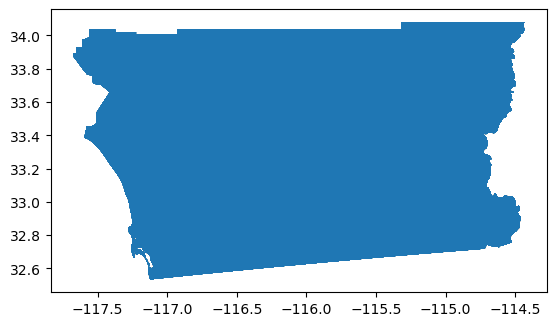

In [8]:
newdf.plot()

I am changing the column names to more informative values.

In [9]:
newdf = newdf.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0          13   Imperial    Southern       6      6            06   
1          13   Imperial    Southern       6      6            06   
2          13   Imperial    Southern       6      6            06   
3          13   Imperial    Southern       6      6            06   
4          13   Imperial    Southern       6      6            06   
..        ...        ...         ...     ...    ...           ...   
157        37  San Diego    Southern       6      6            06   
158        37  San Diego    Southern       6      6            06   
159        37  San Diego    Southern       6      6            06   
160        37  San Diego    Southern       6      6            06   
161        37  San Diego    Southern       6      6            06   

    County_FIPS_ID   Shape__Area  Shape__Length  \
0              025  1.656500e+10  593759.567299   
1              025  1.656500e+10  593759.567299   
2              025  1.656500e+10  593759.567299   
3              025  1.656500e+10  593759.567299   
4              025  1.656500e+10  593759.567299   
..             ...           ...            ...   
157            073  1.566154e+10  740895.337015   
158            073  1.566154e+10  740895.337015   
159            073  1.566154e+10  740895.337015   
160            073  1.566154e+10  740895.337015   
161            073  1.566154e+10  740895.337015   

                                              geometry  ...  State  None  \
0    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
1    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
2    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
3    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
4    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
..                                                 ...  ...    ...   ...   
157  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
158  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
159  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
160  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
161  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   

    Abnormally Dry  Moderate Drought  Severe Drought  Extreme Drought  \
0            92.54              7.46             0.0              0.0   
1            92.54              7.46             0.0              0.0   
2            15.36             84.64             0.0              0.0   
3            15.63             84.37             0.0              0.0   
4            13.43             86.57             0.0              0.0   
..             ...               ...             ...              ...   
157           0.00            100.00             0.0              0.0   
158           0.00            100.00             0.0              0.0   
159           0.00            100.00             0.0              0.0   
160           0.00            100.00             0.0              0.0   
161           0.00            100.00             0.0              0.0   

     Exceptional Drought  ValidStart    ValidEnd StatisticFormatID  
0                      0  2019-02-12  2019-02-18                 2  
1                      0  2019-02-05  2019-02-11                 2  
2                      0  2019-01-29  2019-02-04                 2  
3                      0  2019-01-22  2019-01-28                 2  
4                      0  2019-01-15  2019-01-21                 2  
..                   ...         ...         ...               ...  
157                    0  2018-03-06  2018-03-12                 2  
158                    0  2018-02-27  2018-03-05                 2  
159                    0  2018-02-20  2018-02-26                 2  
160                    0  2018-02-13  2018-02-19                 2  
161           

Next, I project my file to the mercator system so that I can add a basemap later on.

In [10]:
newdf_mercator = newdf.to_crs(3857)

<AxesSubplot: >

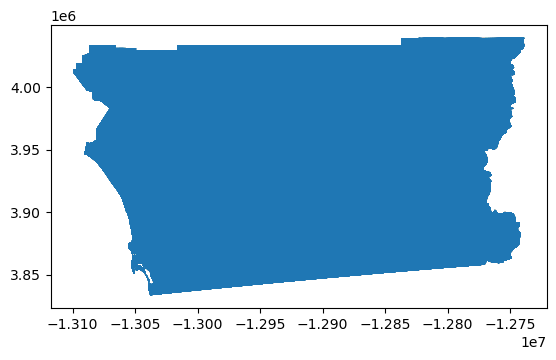

In [11]:
newdf_mercator.plot()

# Adding BaseMap & Analyzing different levels of Drought in Imperial County

Here, I create two graphs displaying different levels of drought. Where D1 is Moderate Drought and D2 is Severe Drought. The Bar on the right hand side is the proportion of land in each county that is classified to be experience either Moderate or Severe Drought. I do not include maps for D0, D3, or D4, as none of the area is currently experiencing that level of drought. 


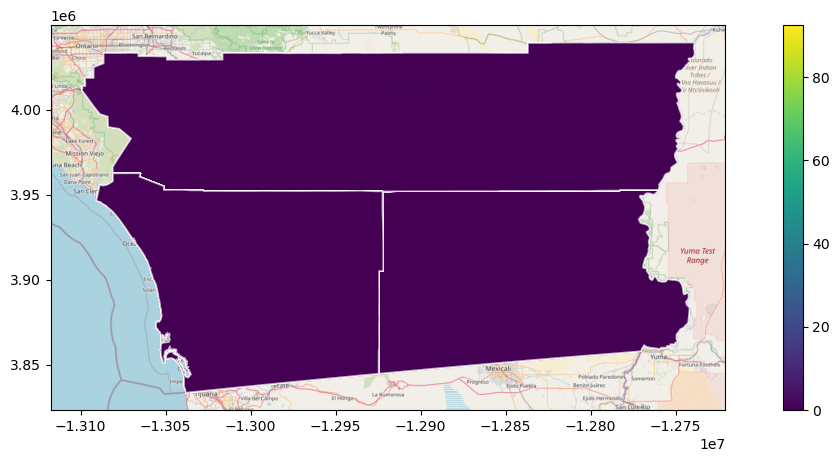

In [12]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Abnormally Dry',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [13]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Moderate Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

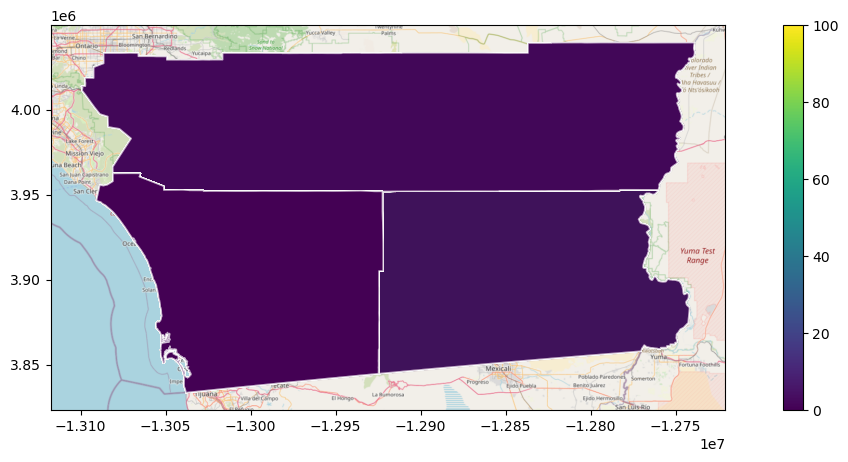

In [14]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='White',
    alpha=0.4,
    column='Severe Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

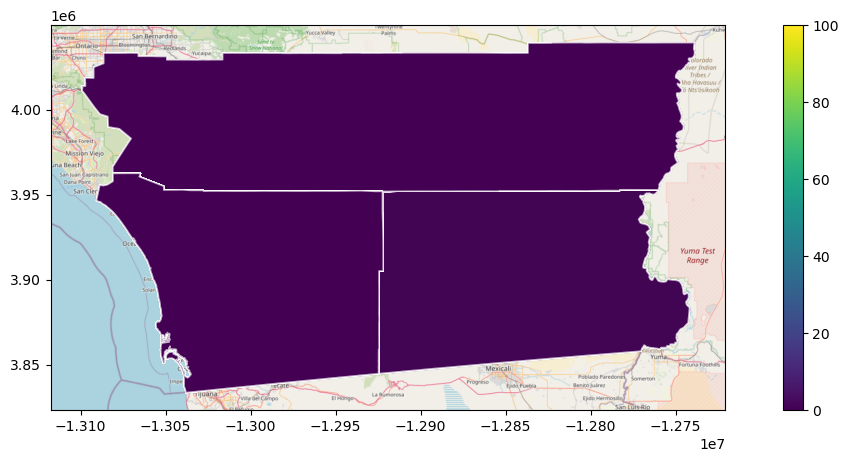

In [15]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='White',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

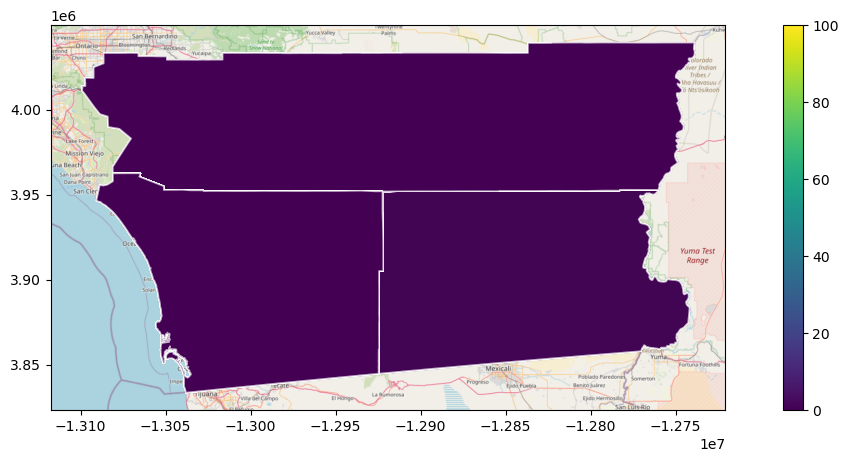

In [16]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='White',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

# Graphs for 2019 - 2020 Data

In [17]:
countydf2=pd.read_csv('2019_2020Drought.csv')

In [18]:
newdf2= counties_gdf.merge(countydf2, on="CountyName")

In [19]:
newdf2.sample()

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
4        13   Imperial    Southern       6      6            06   

  County_FIPS_ID   Shape__Area  Shape__Length  \
4            025  1.656500e+10  593759.567299   

                                            geometry  ...  State   None   D0  \
4  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.0  0.0   

    D1  D2  D3  D4  ValidStart    ValidEnd StatisticFormatID  
4  0.0   0   0   0  2020-01-14  2020-01-20                 2  

[1 rows x 22 columns]

In [20]:
newdf2 = newdf2.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf2

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0          13   Imperial    Southern       6      6            06   
1          13   Imperial    Southern       6      6            06   
2          13   Imperial    Southern       6      6            06   
3          13   Imperial    Southern       6      6            06   
4          13   Imperial    Southern       6      6            06   
..        ...        ...         ...     ...    ...           ...   
154        37  San Diego    Southern       6      6            06   
155        37  San Diego    Southern       6      6            06   
156        37  San Diego    Southern       6      6            06   
157        37  San Diego    Southern       6      6            06   
158        37  San Diego    Southern       6      6            06   

    County_FIPS_ID   Shape__Area  Shape__Length  \
0              025  1.656500e+10  593759.567299   
1              025  1.656500e+10  593759.567299   
2              025  1.656500e+10  593759.567299   
3              025  1.656500e+10  593759.567299   
4              025  1.656500e+10  593759.567299   
..             ...           ...            ...   
154            073  1.566154e+10  740895.337015   
155            073  1.566154e+10  740895.337015   
156            073  1.566154e+10  740895.337015   
157            073  1.566154e+10  740895.337015   
158            073  1.566154e+10  740895.337015   

                                              geometry  ...  State    None  \
0    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.00   
1    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.00   
2    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.00   
3    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.00   
4    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA  100.00   
..                                                 ...  ...    ...     ...   
154  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA    1.71   
155  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA    1.67   
156  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA    1.67   
157  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA    1.67   
158  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA    0.00   

    Abnormally Dry  Moderate Drought  Severe Drought  Extreme Drought  \
0             0.00              0.00               0                0   
1             0.00              0.00               0                0   
2             0.00              0.00               0                0   
3             0.00              0.00               0                0   
4             0.00              0.00               0                0   
..             ...               ...             ...              ...   
154          98.29              0.00               0                0   
155          98.33              0.00               0                0   
156          98.33              0.00               0                0   
157          93.15              5.18               0                0   
158           0.00            100.00               0                0   

     Exceptional Drought  ValidStart    ValidEnd StatisticFormatID  
0                      0  2020-02-11  2020-02-17                 2  
1                      0  2020-02-04  2020-02-10                 2  
2                      0  2020-01-28  2020-02-03                 2  
3                      0  2020-01-21  2020-01-27                 2  
4                      0  2020-01-14  2020-01-20                 2  
..                   ...         ...         ...               ...  
154                    0  2019-03-12  2019-03-18                 2  
155                    0  2019-03-05  2019-03-11                 2  
156                    0  2019-02-26  2019-03-04                 2  
157                    0  2019-02-19  2019-02-25           

In [21]:
newdf_mercator2 = newdf2.to_crs(3857)

In [22]:
newdf_mercator2.plot()

<AxesSubplot: >

In [23]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator2.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Abnormally Dry',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [24]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator2.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Moderate Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

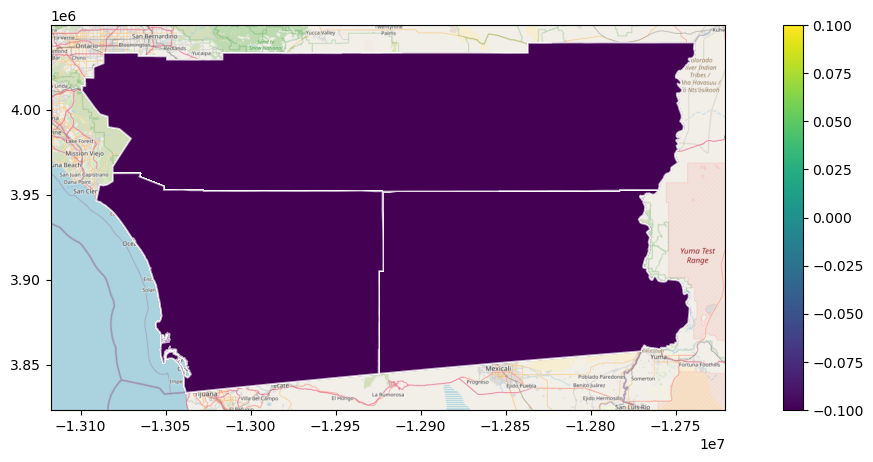

In [25]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator2.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Severe Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

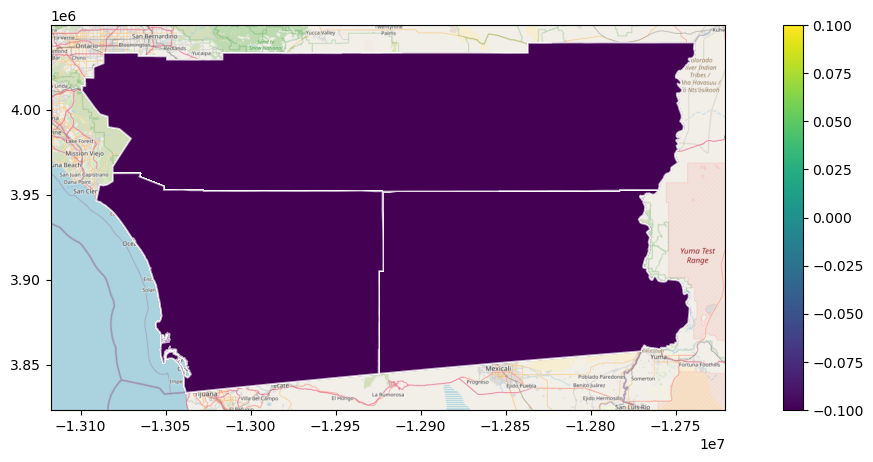

In [26]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator2.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

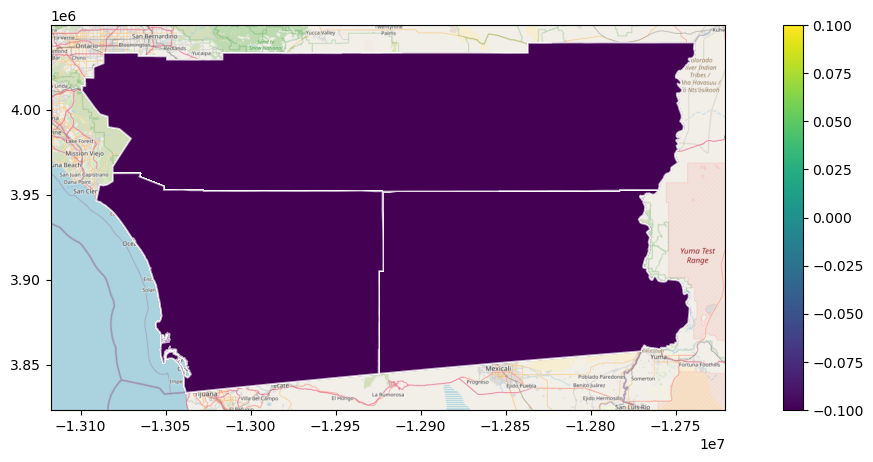

In [27]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator2.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Exceptional Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

# 2020-2021 Drought Data 

In [28]:
countydf3=pd.read_csv('2020_2021Drought.csv')
newdf3= counties_gdf.merge(countydf3, on="CountyName")
newdf3.sample()

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
88        33  Riverside    Southern       6      6            06   

   County_FIPS_ID   Shape__Area  Shape__Length  \
88            065  2.741787e+10  907833.753925   

                                             geometry  ...  State   None   D0  \
88  POLYGON ((-116.26057 34.03451, -116.25296 34.0...  ...     CA  100.0  0.0   

     D1   D2   D3  D4  ValidStart    ValidEnd StatisticFormatID  
88  0.0  0.0  0.0   0  2020-06-09  2020-06-15                 2  

[1 rows x 22 columns]

In [29]:
newdf3 = newdf3.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf3

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0          13   Imperial    Southern       6      6            06   
1          13   Imperial    Southern       6      6            06   
2          13   Imperial    Southern       6      6            06   
3          13   Imperial    Southern       6      6            06   
4          13   Imperial    Southern       6      6            06   
..        ...        ...         ...     ...    ...           ...   
154        37  San Diego    Southern       6      6            06   
155        37  San Diego    Southern       6      6            06   
156        37  San Diego    Southern       6      6            06   
157        37  San Diego    Southern       6      6            06   
158        37  San Diego    Southern       6      6            06   

    County_FIPS_ID   Shape__Area  Shape__Length  \
0              025  1.656500e+10  593759.567299   
1              025  1.656500e+10  593759.567299   
2              025  1.656500e+10  593759.567299   
3              025  1.656500e+10  593759.567299   
4              025  1.656500e+10  593759.567299   
..             ...           ...            ...   
154            073  1.566154e+10  740895.337015   
155            073  1.566154e+10  740895.337015   
156            073  1.566154e+10  740895.337015   
157            073  1.566154e+10  740895.337015   
158            073  1.566154e+10  740895.337015   

                                              geometry  ...  State    None  \
0    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA    0.00   
1    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA    0.00   
2    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA    0.00   
3    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA    0.00   
4    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA    0.00   
..                                                 ...  ...    ...     ...   
154  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA   87.93   
155  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA  100.00   
156  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA  100.00   
157  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA  100.00   
158  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA  100.00   

    Abnormally Dry  Moderate Drought  Severe Drought  Extreme Drought  \
0             7.50             89.52            2.98             0.00   
1             7.50             89.52            2.98             0.00   
2             5.78             91.13            3.10             0.00   
3             5.78             14.49           79.51             0.22   
4             5.78             14.37           79.63             0.22   
..             ...               ...             ...              ...   
154          12.07              0.00            0.00             0.00   
155           0.00              0.00            0.00             0.00   
156           0.00              0.00            0.00             0.00   
157           0.00              0.00            0.00             0.00   
158           0.00              0.00            0.00             0.00   

     Exceptional Drought  ValidStart    ValidEnd StatisticFormatID  
0                      0  2021-02-09  2021-02-15                 2  
1                      0  2021-02-02  2021-02-08                 2  
2                      0  2021-01-26  2021-02-01                 2  
3                      0  2021-01-19  2021-01-25                 2  
4                      0  2021-01-12  2021-01-18                 2  
..                   ...         ...         ...               ...  
154                    0  2020-03-10  2020-03-16                 2  
155                    0  2020-03-03  2020-03-09                 2  
156                    0  2020-02-25  2020-03-02                 2  
157                    0  2020-02-18  2020-02-24           

<AxesSubplot: >

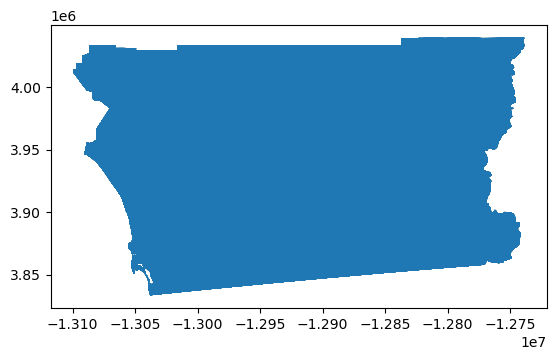

In [30]:
newdf_mercator3 = newdf3.to_crs(3857)
newdf_mercator3.plot()

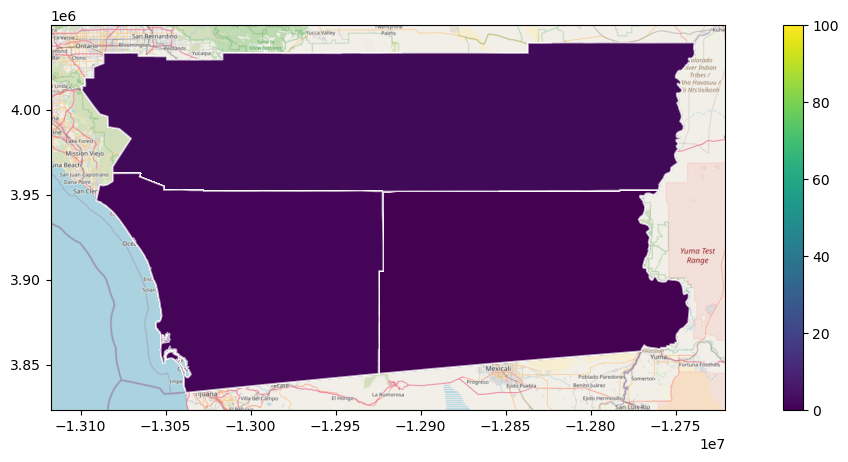

In [31]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator3.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Abnormally Dry',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

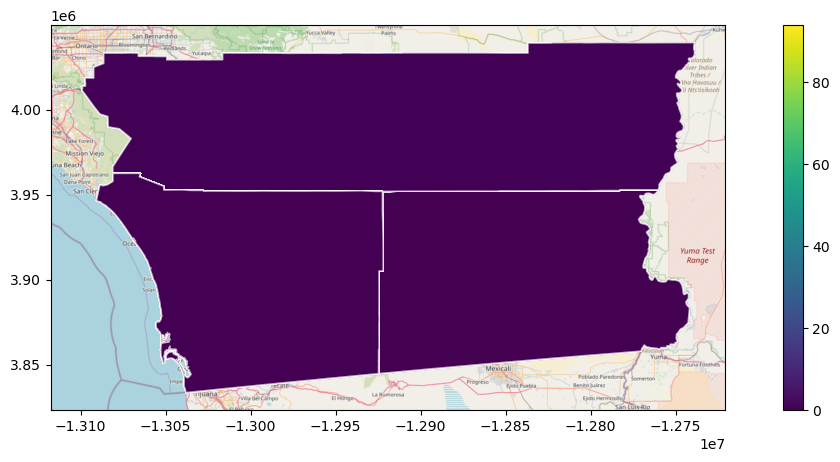

In [32]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator3.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Moderate Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [33]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator3.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Severe Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

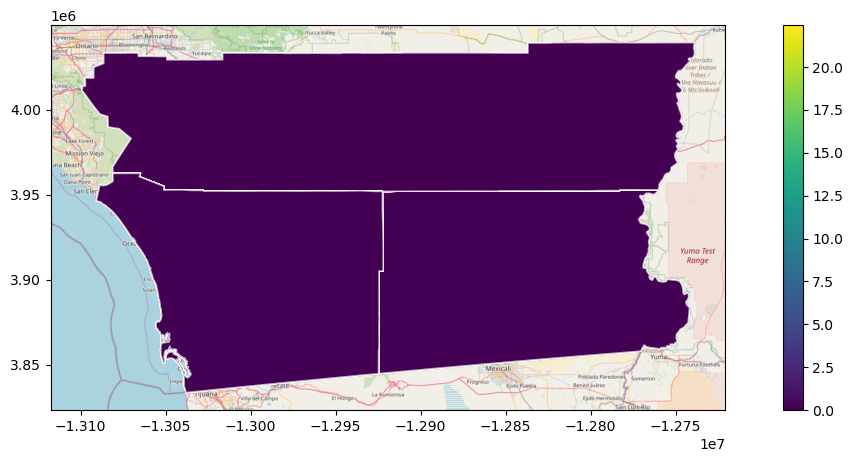

In [34]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator3.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

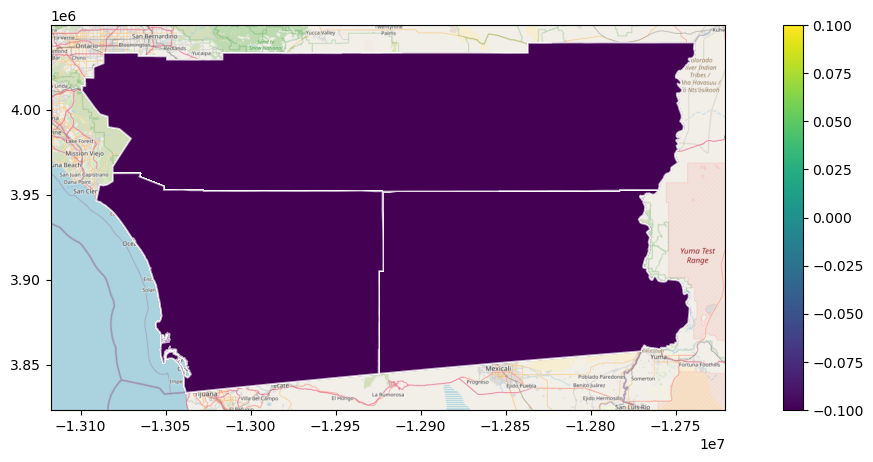

In [35]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator3.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Exceptional Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

# 2021-2022 Drought Data

In [36]:
countydf4=pd.read_csv('2021_2022Drought.csv')
newdf4= counties_gdf.merge(countydf4, on="CountyName")
newdf4.sample()

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
47        13   Imperial    Southern       6      6            06   

   County_FIPS_ID   Shape__Area  Shape__Length  \
47            025  1.656500e+10  593759.567299   

                                             geometry  ...  State  None    D0  \
47  POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0  8.36   

       D1    D2   D3   D4  ValidStart    ValidEnd StatisticFormatID  
47  88.66  2.98  0.0  0.0  2021-03-16  2021-03-22                 2  

[1 rows x 22 columns]

In [37]:
newdf4 = newdf4.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf4

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0          13   Imperial    Southern       6      6            06   
1          13   Imperial    Southern       6      6            06   
2          13   Imperial    Southern       6      6            06   
3          13   Imperial    Southern       6      6            06   
4          13   Imperial    Southern       6      6            06   
..        ...        ...         ...     ...    ...           ...   
154        37  San Diego    Southern       6      6            06   
155        37  San Diego    Southern       6      6            06   
156        37  San Diego    Southern       6      6            06   
157        37  San Diego    Southern       6      6            06   
158        37  San Diego    Southern       6      6            06   

    County_FIPS_ID   Shape__Area  Shape__Length  \
0              025  1.656500e+10  593759.567299   
1              025  1.656500e+10  593759.567299   
2              025  1.656500e+10  593759.567299   
3              025  1.656500e+10  593759.567299   
4              025  1.656500e+10  593759.567299   
..             ...           ...            ...   
154            073  1.566154e+10  740895.337015   
155            073  1.566154e+10  740895.337015   
156            073  1.566154e+10  740895.337015   
157            073  1.566154e+10  740895.337015   
158            073  1.566154e+10  740895.337015   

                                              geometry  ...  State  None  \
0    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
1    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
2    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
3    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
4    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
..                                                 ...  ...    ...   ...   
154  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
155  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
156  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
157  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
158  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   

    Abnormally Dry  Moderate Drought  Severe Drought  Extreme Drought  \
0             0.00            100.00             0.0              0.0   
1             0.00            100.00             0.0              0.0   
2             0.00            100.00             0.0              0.0   
3             0.00            100.00             0.0              0.0   
4             0.00            100.00             0.0              0.0   
..             ...               ...             ...              ...   
154          94.34              5.66             0.0              0.0   
155          94.34              5.66             0.0              0.0   
156          94.89              5.11             0.0              0.0   
157          94.89              5.11             0.0              0.0   
158          94.89              5.11             0.0              0.0   

     Exceptional Drought  ValidStart    ValidEnd StatisticFormatID  
0                    0.0  2022-02-08  2022-02-14                 2  
1                    0.0  2022-02-01  2022-02-07                 2  
2                    0.0  2022-01-25  2022-01-31                 2  
3                    0.0  2022-01-18  2022-01-24                 2  
4                    0.0  2022-01-11  2022-01-17                 2  
..                   ...         ...         ...               ...  
154                  0.0  2021-03-09  2021-03-15                 2  
155                  0.0  2021-03-02  2021-03-08                 2  
156                  0.0  2021-02-23  2021-03-01                 2  
157                  0.0  2021-02-16  2021-02-22                 2  
158           

<AxesSubplot: >

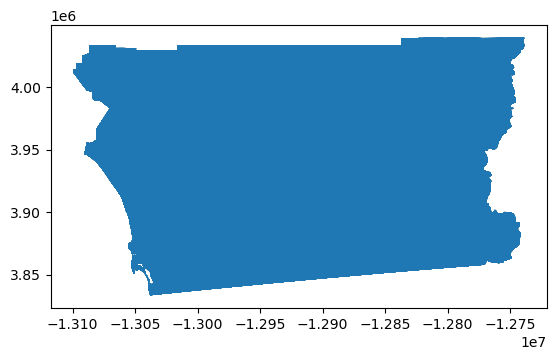

In [38]:
newdf_mercator4 = newdf4.to_crs(3857)
newdf_mercator4.plot()

In [39]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator4.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Abnormally Dry',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator4.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Moderate Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [41]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator4.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Severe Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [42]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator4.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

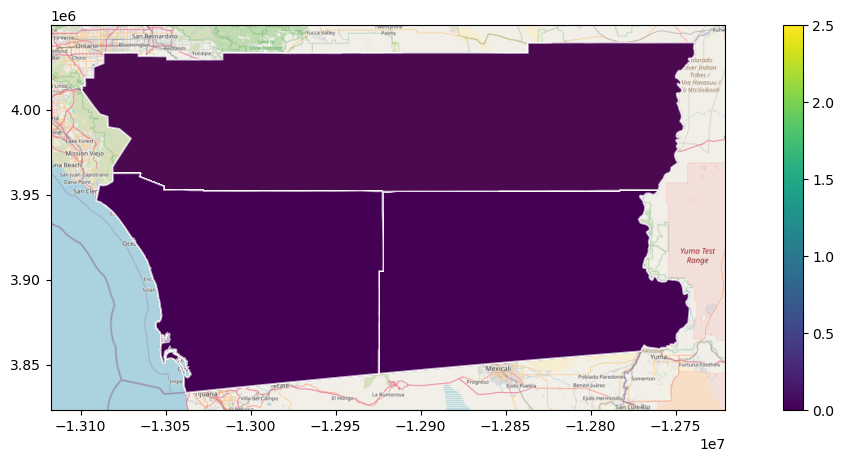

In [43]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator4.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Exceptional Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

# 2022-2023 Drought Data

In [44]:
countydf5=pd.read_csv('2022_2023Drought.csv')
newdf5= counties_gdf.merge(countydf5, on="CountyName")
newdf5.sample()

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
67        33  Riverside    Southern       6      6            06   

   County_FIPS_ID   Shape__Area  Shape__Length  \
67            065  2.741787e+10  907833.753925   

                                             geometry  ...  State  None   D0  \
67  POLYGON ((-116.26057 34.03451, -116.25296 34.0...  ...     CA     0  0.0   

       D1     D2   D3  D4  ValidStart    ValidEnd StatisticFormatID  
67  43.42  56.58  0.0   0  2022-11-01  2022-11-07                 2  

[1 rows x 22 columns]

In [45]:
newdf5 = newdf5.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf5

OBJECTID CountyName AdminRegion FireMAR LawMAR State_FIPS_ID  \
0          13   Imperial    Southern       6      6            06   
1          13   Imperial    Southern       6      6            06   
2          13   Imperial    Southern       6      6            06   
3          13   Imperial    Southern       6      6            06   
4          13   Imperial    Southern       6      6            06   
..        ...        ...         ...     ...    ...           ...   
154        37  San Diego    Southern       6      6            06   
155        37  San Diego    Southern       6      6            06   
156        37  San Diego    Southern       6      6            06   
157        37  San Diego    Southern       6      6            06   
158        37  San Diego    Southern       6      6            06   

    County_FIPS_ID   Shape__Area  Shape__Length  \
0              025  1.656500e+10  593759.567299   
1              025  1.656500e+10  593759.567299   
2              025  1.656500e+10  593759.567299   
3              025  1.656500e+10  593759.567299   
4              025  1.656500e+10  593759.567299   
..             ...           ...            ...   
154            073  1.566154e+10  740895.337015   
155            073  1.566154e+10  740895.337015   
156            073  1.566154e+10  740895.337015   
157            073  1.566154e+10  740895.337015   
158            073  1.566154e+10  740895.337015   

                                              geometry  ...  State  None  \
0    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
1    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
2    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
3    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
4    POLYGON ((-116.08439 33.42611, -116.08433 33.4...  ...     CA     0   
..                                                 ...  ...    ...   ...   
154  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
155  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
156  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
157  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   
158  MULTIPOLYGON (((-117.38004 33.50546, -117.3728...  ...     CA     0   

    Abnormally Dry  Moderate Drought  Severe Drought  Extreme Drought  \
0            47.65             52.35            0.00              0.0   
1            47.65             52.35            0.00              0.0   
2            47.65             52.35            0.00              0.0   
3            47.65             52.35            0.00              0.0   
4            47.65             52.35            0.00              0.0   
..             ...               ...             ...              ...   
154           0.00             99.31            0.69              0.0   
155           0.00             99.31            0.69              0.0   
156           0.00            100.00            0.00              0.0   
157           0.00            100.00            0.00              0.0   
158           0.00            100.00            0.00              0.0   

     Exceptional Drought  ValidStart    ValidEnd StatisticFormatID  
0                      0  2023-02-07  2023-02-13                 2  
1                      0  2023-01-31  2023-02-06                 2  
2                      0  2023-01-24  2023-01-30                 2  
3                      0  2023-01-17  2023-01-23                 2  
4                      0  2023-01-10  2023-01-16                 2  
..                   ...         ...         ...               ...  
154                    0  2022-03-08  2022-03-14                 2  
155                    0  2022-03-01  2022-03-07                 2  
156                    0  2022-02-22  2022-02-28                 2  
157                    0  2022-02-15  2022-02-21                 2  
158           

<AxesSubplot: >

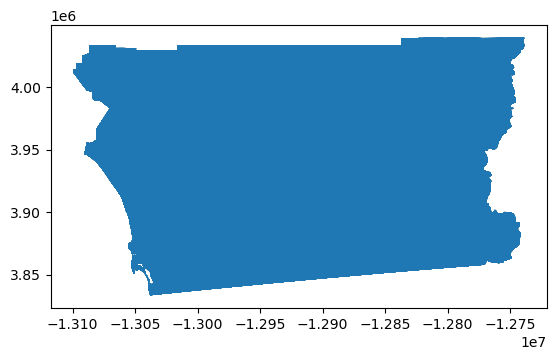

In [46]:
newdf_mercator5 = newdf5.to_crs(3857)
newdf_mercator5.plot()

In [47]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator5.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Abnormally Dry',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

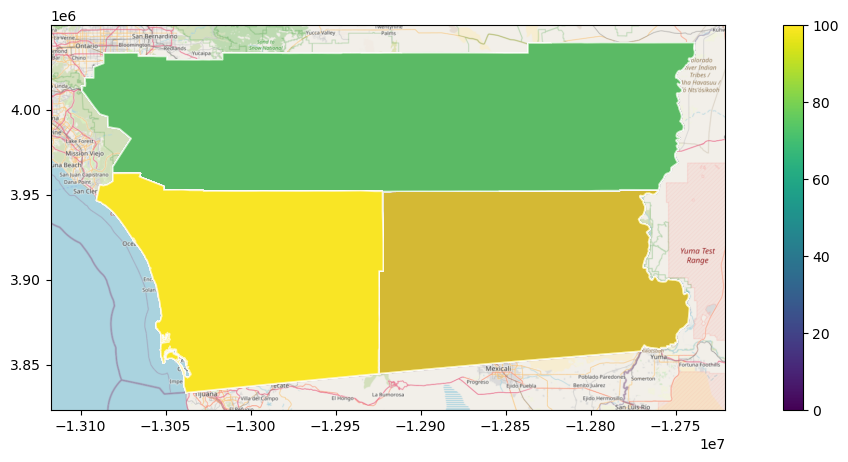

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator5.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Moderate Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

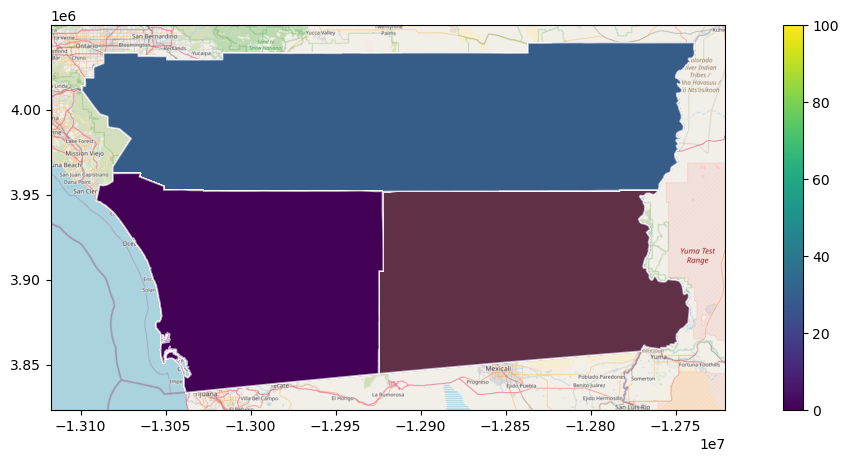

In [49]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator5.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Severe Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

In [50]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator5.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Extreme Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

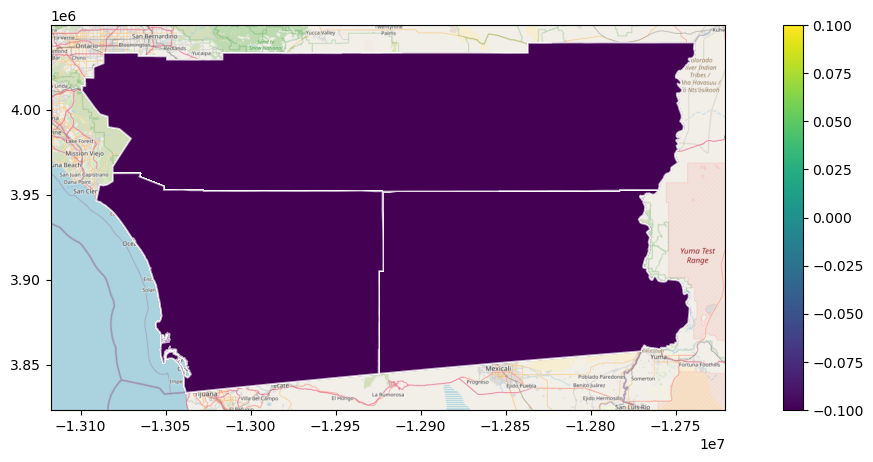

In [51]:
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator5.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.4,
    column='Exceptional Drought',
    cmap='viridis',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')